In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = load_digits()

In [4]:
mnist.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [5]:
mnist['DESCR']

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [6]:
print mnist['images'].shape
print mnist['data'].shape
print mnist['target_names'].shape
print mnist['target'].shape

(1797, 8, 8)
(1797, 64)
(10,)
(1797,)


In [12]:
def add_x0(X):
    temp = list(X.T)
    temp.insert(0,np.ones(X.shape[0]))
    return np.array(temp).T

In [13]:
add_x0(mnist['data'])

array([[  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,  10.,   0.,   0.],
       [  1.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  1.,   0.,   0., ...,   6.,   0.,   0.],
       [  1.,   0.,   0., ...,  12.,   0.,   0.],
       [  1.,   0.,   0., ...,  12.,   1.,   0.]])

In [46]:
enc = sklearn.preprocessing.OneHotEncoder()

In [47]:
enc.fit(np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1))

OneHotEncoder(categorical_features='all', dtype=<type 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [50]:
mnist['target_onehot'] = enc.transform(mnist['target'].reshape(-1,1)).toarray()

In [135]:
train_data, test_data, train_target, test_target = train_test_split(mnist['data'],mnist['target_onehot'])

In [136]:
np.array(train_data).T.shape

(64, 1347)

In [203]:
train_data.shape
fig, axes = plt.subplots(5, 6)
fig.set_figheight(10)
fig.set_figwidth(15)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[0].min(), model.coefs_[0].max()
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

(1347, 64)

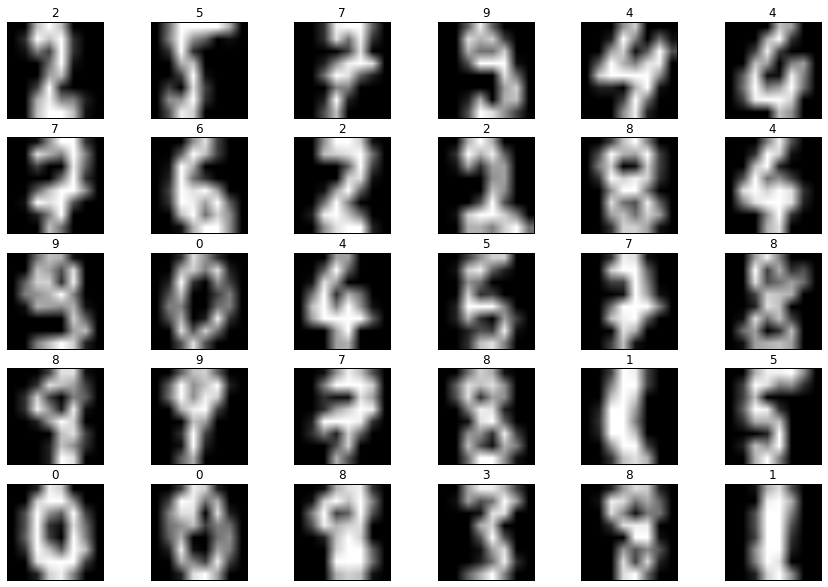

In [272]:
fig, axes = plt.subplots(5, 6)
fig.set_figheight(10)
fig.set_figwidth(15)

for train_sample, sample_target, ax in zip(train_data[:30],train_target[:30], axes.ravel()):
    ax.imshow(train_sample.reshape(8,8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(list(sample_target).index(1))
plt.show()

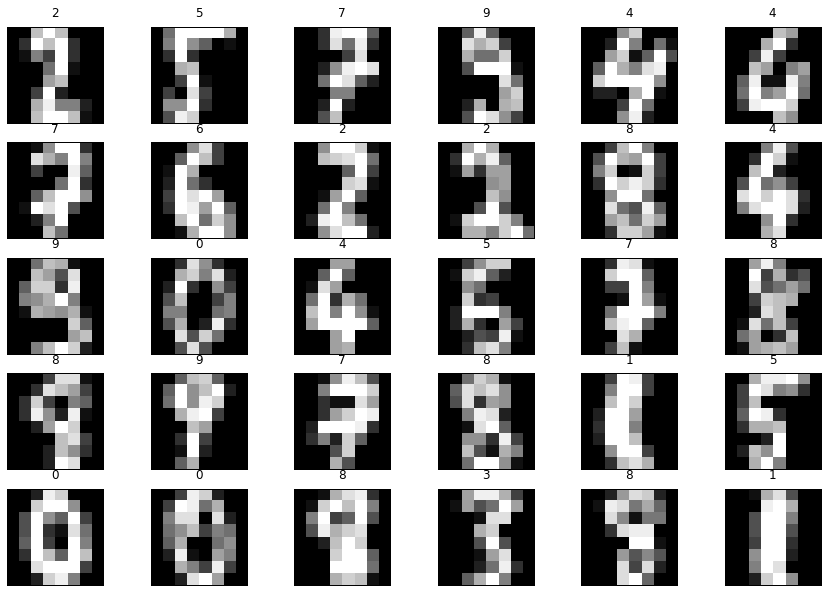

In [273]:
fig, axes = plt.subplots(5, 6)
fig.set_figheight(10)
fig.set_figwidth(15)

for train_sample, sample_target, ax in zip(train_data[:30],train_target[:30], axes.ravel()):
    ax.matshow(train_sample.reshape(8,8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(list(sample_target).index(1))
plt.show()

In [219]:
def derivative(f,epsilon=0.001):
    return (lambda x: (f(x+epsilon)-f(x-epsilon))/(2.0*epsilon))

In [461]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [137]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

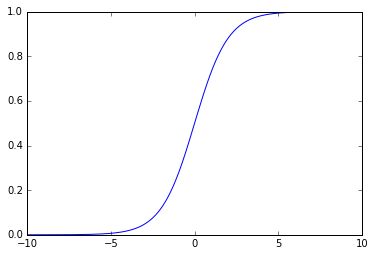

In [138]:
x = np.arange(-10,10,.01)
plt.plot(x,sigmoid(x))
plt.show()

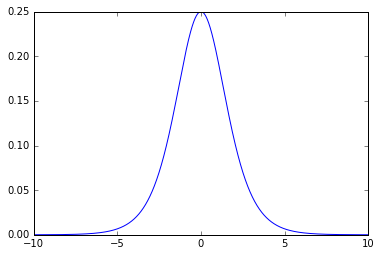

In [140]:
x = np.arange(-10,10,.01)
plt.plot(x,derivative(sigmoid,0.001)(x))
plt.show()

In [141]:
def relu(x):
    return np.array(map((lambda x: x if x>0 else 0.0),x))

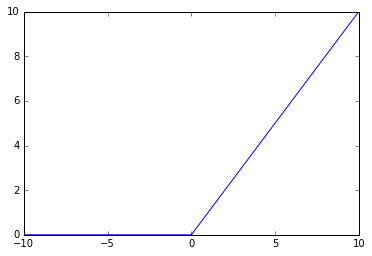

In [142]:
x = np.arange(-10,10,.01)
plt.plot(x,relu(x))
plt.show()

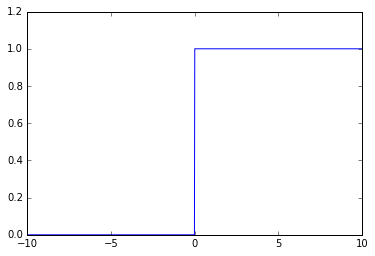

In [143]:
x = np.arange(-10,10,.01)
plt.plot(x,derivative(relu,0.001)(x))
plt.show()

In [144]:
### UNFINISHED !!!
class neural_network:
    def __init__(self,X,y):
        self.X = X
        try: 
            _ = y.shape[1]
            self.y = y
        except IndexError:
            self.y = y.reshape(-1,1)
        self.layer_weights = []
        self.layer_non_linearities = []
        self.activations = []
        self.cost_function = None
        self.deltaW = []
        self.error = []
    def test_print(self):
        print self.y.shape
    def create_network(self,hidden_layers,output_nonlinearity):
        '''layers should be a list of pairs of number of nodes and nonlinearity'''
        while hidden_layers:
            if self.layer_weights == []:
                input_size = self.X.shape[1]
            else:
                input_size = self.layer_weights[-1].shape[1]
            hidden_output_size, hidden_output_nonlinearity = hidden_layers.pop(0)
            self.__add_layer(input_size,hidden_output_size,hidden_output_nonlinearity)
        #output_layer
        input_size = self.layer_weights[-1].shape[1]
        output_size = self.y.shape[1]
        self.__add_layer(input_size, output_size, output_nonlinearity)
        
    def __add_layer(self, input_size, output_size, non_linearity):
        #the range to initilize the weights is dependent on the nonlinearity you use
        #here we use Glorot also known as Xavier initialization:
        weights = (np.random.random([input_size+1,output_size])-0.5)/np.sqrt(float(input_size+1))
        self.layer_weights.append(weights)
        self.layer_non_linearities.append(non_linearity)
    def feed_forward(self,X=None,_W=None,_non_linearities=None):
        if X==None:
            X = self.X
        self.activations = []
        for layer_weights,non_linearity in zip(*(self.layer_weights,self.layer_non_linearities)):
            if self.activations == []:
                input = add_x0(X)
            else:
                input = add_x0(self.activations[-1])
            activations = non_linearity(np.dot(input,layer_weights))
            self.activations.append(activations)
        return np.array(self.activations[-1])                
    def cost(self,X,y,cost_function):
        self.cost_function = cost_function
        return cost_function(self.feed_forward(X),y)        
    def backprop(self,X,y):
        if self.cost_function == None:
            raise AttributeError("Must supply cost_function in neural_network.cost()")
        ##### UNFINISHED!!!!! ######
        self.deltaW = []
        self.error = []
        for layer_weights,non_linearity in zip(*(self.layer_weights,self.layer_non_linearities))[::-1]:
            self.deltaW.append(0)
    def train(self,batch_size,learning_rate,epochs):
        ##### UNFINISHED!!!!! ######
        return

In [145]:
my_nn = neural_network(train_data,train_target)

In [146]:
my_nn.test_print()

(1347, 10)


In [147]:
my_nn.create_network([[10,sigmoid]],sigmoid)

In [148]:
my_nn.layer_weights[0].shape

(65, 10)

In [149]:
my_nn.feed_forward()

array([[ 0.49552186,  0.50042983,  0.50822175, ...,  0.51626248,
         0.43367667,  0.54799028],
       [ 0.48689341,  0.49130808,  0.51467644, ...,  0.53308586,
         0.3871464 ,  0.55991439],
       [ 0.49589657,  0.50433393,  0.46437791, ...,  0.49795343,
         0.43266209,  0.55178526],
       ..., 
       [ 0.48746491,  0.49921141,  0.49103799, ...,  0.5043961 ,
         0.41778661,  0.55991681],
       [ 0.4851389 ,  0.49802807,  0.49599949, ...,  0.51401619,
         0.41771268,  0.55401582],
       [ 0.49673274,  0.5090406 ,  0.51345347, ...,  0.53091717,
         0.37942257,  0.55351202]])

In [151]:
import sklearn.neural_network

In [260]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(30,20),verbose=True,early_stopping=True,tol=-1)

In [261]:
model.fit(train_data,train_target)

Iteration 1, loss = 10.60598080
Validation score: 0.088889
Iteration 2, loss = 6.43481328
Validation score: 0.044444
Iteration 3, loss = 5.36048641
Validation score: 0.029630
Iteration 4, loss = 4.75054747
Validation score: 0.029630
Iteration 5, loss = 4.17724256
Validation score: 0.059259
Iteration 6, loss = 3.69186655
Validation score: 0.081481
Iteration 7, loss = 3.35500074
Validation score: 0.103704
Iteration 8, loss = 3.07303500
Validation score: 0.133333
Iteration 9, loss = 2.82646818
Validation score: 0.162963
Iteration 10, loss = 2.61500998
Validation score: 0.185185
Iteration 11, loss = 2.43500358
Validation score: 0.229630
Iteration 12, loss = 2.26617506
Validation score: 0.296296
Iteration 13, loss = 2.09789839
Validation score: 0.318519
Iteration 14, loss = 1.96075565
Validation score: 0.362963
Iteration 15, loss = 1.82493799
Validation score: 0.437037
Iteration 16, loss = 1.71774300
Validation score: 0.459259
Iteration 17, loss = 1.60702423
Validation score: 0.451852
Itera

Validation score: 0.903704
Iteration 145, loss = 0.08330813
Validation score: 0.903704
Iteration 146, loss = 0.08201175
Validation score: 0.911111
Iteration 147, loss = 0.08196986
Validation score: 0.911111
Iteration 148, loss = 0.08063807
Validation score: 0.903704
Iteration 149, loss = 0.08094096
Validation score: 0.911111
Iteration 150, loss = 0.08047121
Validation score: 0.911111
Iteration 151, loss = 0.07724255
Validation score: 0.918519
Iteration 152, loss = 0.07700840
Validation score: 0.911111
Iteration 153, loss = 0.07518692
Validation score: 0.911111
Iteration 154, loss = 0.07414239
Validation score: 0.911111
Iteration 155, loss = 0.07538478
Validation score: 0.911111
Iteration 156, loss = 0.07365593
Validation score: 0.918519
Iteration 157, loss = 0.07215702
Validation score: 0.925926
Iteration 158, loss = 0.07474216
Validation score: 0.925926
Iteration 159, loss = 0.07284569
Validation score: 0.918519
Iteration 160, loss = 0.07132906
Validation score: 0.911111
Iteration 161

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(30, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=-1, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [262]:
model.score(test_data,test_target)

0.9244444444444444

In [263]:
import sklearn.ensemble

In [264]:
model_rfc = sklearn.ensemble.RandomForestClassifier(verbose=True)

In [265]:
model_rfc.fit(train_data,train_target)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [266]:
model_rfc.score(test_data,test_target)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.83333333333333337

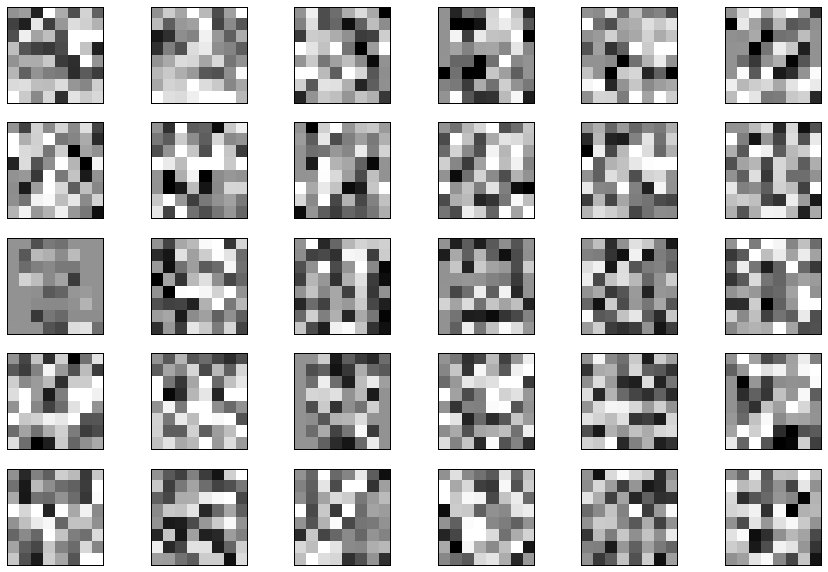

In [271]:
fig, axes = plt.subplots(5, 6)
fig.set_figheight(10)
fig.set_figwidth(15)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[0].min(), model.coefs_[0].max()
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

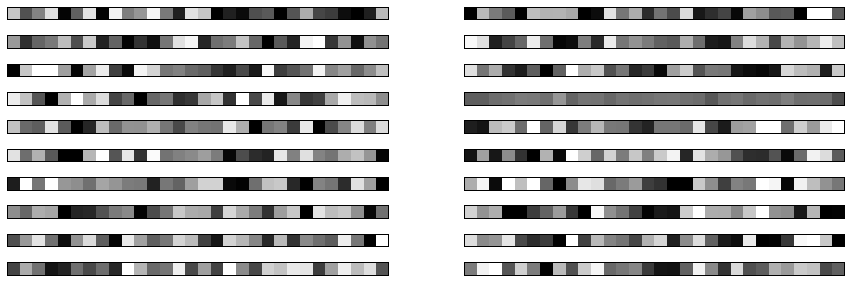

In [268]:
fig, axes = plt.subplots(10, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[1].min(), model.coefs_[1].max()
for coef, ax in zip(model.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(1, 30), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

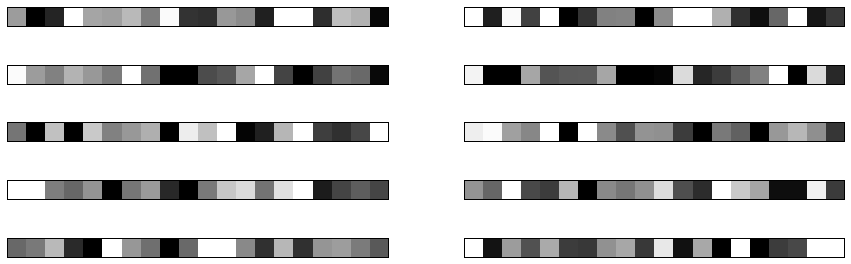

In [269]:
fig, axes = plt.subplots(5, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[2].min(), model.coefs_[2].max()
for coef, ax in zip(model.coefs_[2].T, axes.ravel()):
    ax.matshow(coef.reshape(1, 20), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [198]:
model.coefs_[2].T.shape

(10, 20)

In [297]:
def get_activations(clf, X):
        hidden_layer_sizes = clf.hidden_layer_sizes
        if not hasattr(hidden_layer_sizes, "__iter__"):
            hidden_layer_sizes = [hidden_layer_sizes]
        hidden_layer_sizes = list(hidden_layer_sizes)
        layer_units = [X.shape[1]] + hidden_layer_sizes + \
            [clf.n_outputs_]
        activations = [X]
        for i in range(clf.n_layers_ - 1):
            activations.append(np.empty((X.shape[0],
                                         layer_units[i + 1])))
        clf._forward_pass(activations)
        return activations

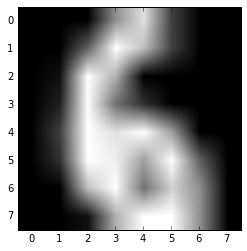

In [295]:
plt.imshow(train_data[7].reshape(8,8),cmap=plt.cm.gray)
plt.show()

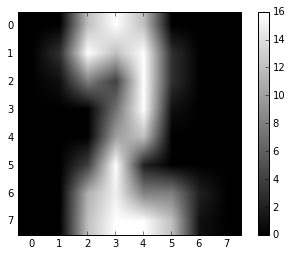

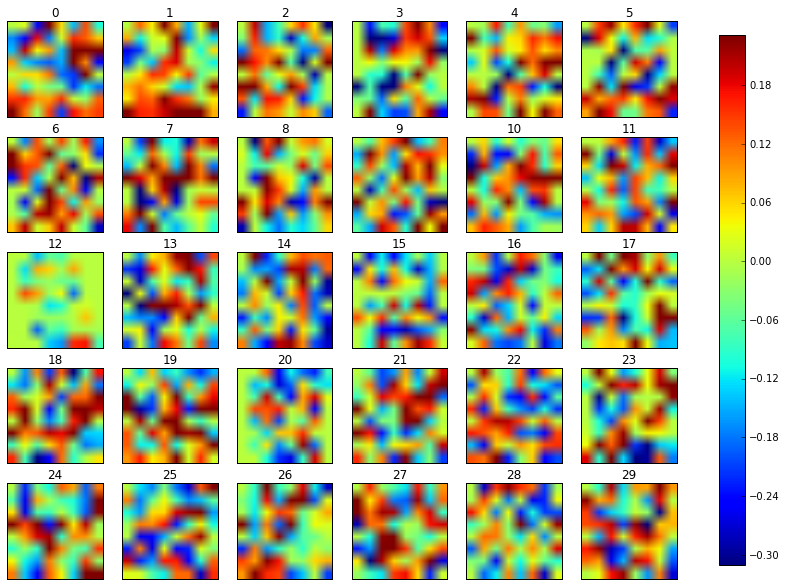

1


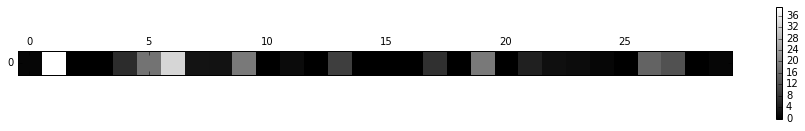

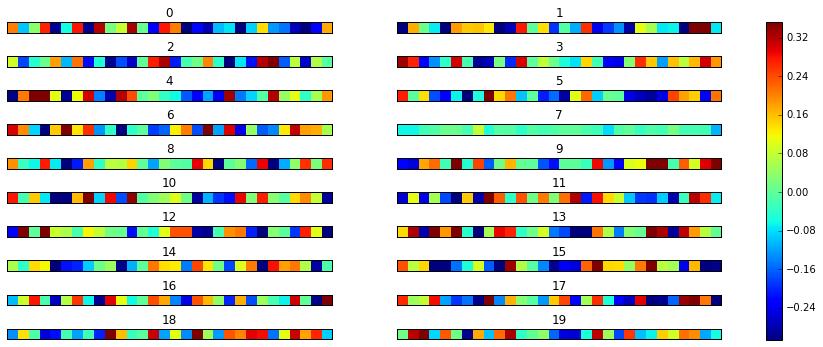

13


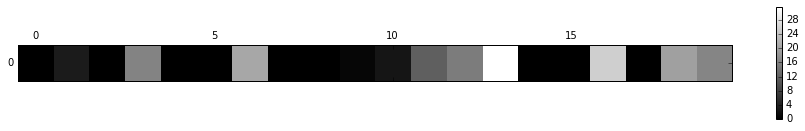

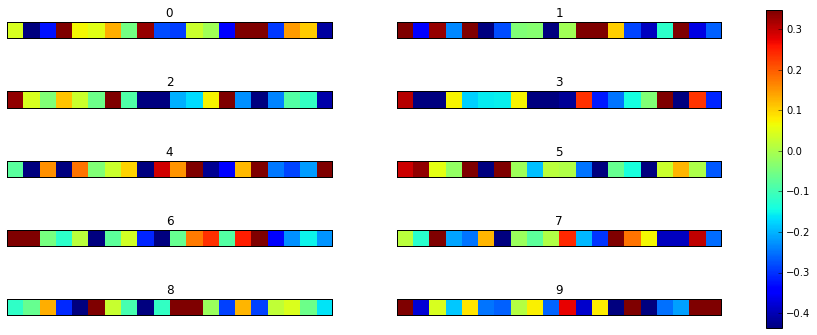

2


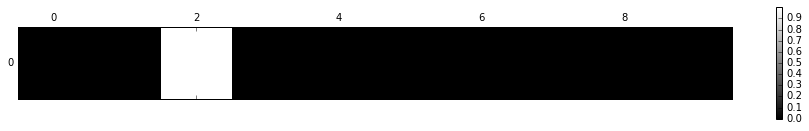

In [509]:
#0, 210
samp = 0
example = train_data[samp]
#example = np.random.random(64)*16
#example = test_data[200]
#example = test_data[100]

plt.imshow(example.reshape(8,8),cmap=plt.cm.gray)
plt.colorbar()
plt.show()
fig, axes = plt.subplots(5, 6)
fig.set_figheight(10)
fig.set_figwidth(15)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[0].min(), model.coefs_[0].max()
#print vmin,vmax
count = 0
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    im = ax.imshow(coef.reshape(8, 8)   ,vmin=.5 * vmin,vmax=.5 * vmax)
    ax.set_title(count)
    count += 1
    ax.set_xticks(())
    ax.set_yticks(())
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)
plt.show()

activations = get_activations(model,example.reshape(1,-1))

print np.argmax(activations[1])
plt.matshow(activations[1], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

fig, axes = plt.subplots(10, 2)
fig.set_figheight(6)
fig.set_figwidth(16)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[1].min(), model.coefs_[1].max()
#print vmin,vmax
count = 0
for coef, ax in zip(model.coefs_[1].T, axes.ravel()):
    im = ax.matshow(coef.reshape(1, 30) , vmin=.5 * vmin,vmax=.5 * vmax)
    ax.set_title(count)
    count += 1
    ax.set_xticks(())
    ax.set_yticks(())
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)
plt.show()

print np.argmax(activations[2])
plt.matshow(activations[2], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

fig, axes = plt.subplots(5, 2)
fig.set_figheight(6)
fig.set_figwidth(16)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[2].min(), model.coefs_[2].max()
#print vmin,vmax
count = 0
for coef, ax in zip(model.coefs_[2].T, axes.ravel()):
    im = ax.matshow(coef.reshape(1, 20), vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_title(count)
    count +=1
    ax.set_yticks(())
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)
plt.show()

print np.argmax(activations[3])
plt.matshow(activations[3], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [472]:
print np.dot(model.coefs_[0].T,train_data[samp])-model._best_intercepts[0]
print activations[1]

[  0.74562426  38.35340502  -0.59056263 -24.09909602   6.46229933
  17.56191003  32.33149954   3.18594115   3.30192811  18.55250907
  -0.63370484   1.49957752 -11.85383661   9.61052166  -0.61648665
 -15.76162519 -17.19560566   7.34827066  -8.975275    18.7971491
 -25.64697757   5.40405795   2.5171042    1.96671946   1.38444523
  -7.9742264   14.71064642  12.63427159  -0.61732025   1.1152755 ]
[[  0.97966702  38.91743186   0.           0.           6.88228072
   17.50096429  32.65529751   2.93302774   2.83818687  18.67745325   0.
    1.70546313   0.           9.43645299   0.           0.           0.
    7.488263     0.          18.4182795    0.           4.99764124
    2.42974223   1.91963879   0.99827311   0.          15.10680003
   12.53118251   0.           1.051426  ]]


In [473]:
print np.dot(activations[2],model.coefs_[2])
print sigmoid(np.dot(activations[2],model.coefs_[2]) + model._best_intercepts[2])
print activations[3]

[[-16.01092971 -10.93129874   8.55929206  -5.78880638 -26.2995603
  -10.48548646 -14.98447683 -13.03746334 -11.01989308 -20.03536146]]
[[  1.52243974e-07   1.26264669e-05   9.99829124e-01   3.20916396e-03
    2.80039470e-12   2.45182120e-05   1.99015962e-07   1.85137954e-06
    1.87110436e-05   1.84823557e-09]]
[[  1.52243974e-07   1.26264669e-05   9.99829124e-01   3.20916396e-03
    2.80039470e-12   2.45182120e-05   1.99015962e-07   1.85137954e-06
    1.87110436e-05   1.84823557e-09]]


In [488]:
print softmax(np.dot(activations[2],model.coefs_[2]) + model._best_intercepts[2])

[[  2.60192865e-11   2.15795573e-09   9.99999440e-01   5.50228491e-07
    4.78601937e-16   4.19039196e-09   3.40128638e-11   3.16410923e-10
    3.19787395e-09   3.15873018e-13]]


In [496]:
np.exp(np.dot(activations[2],model.coefs_[2]) + model._best_intercepts[2])/np.exp(np.dot(activations[2],model.coefs_[2]) + model._best_intercepts[2]).sum()

array([[  2.60192865e-11,   2.15795573e-09,   9.99999440e-01,
          5.50228491e-07,   4.78601937e-16,   4.19039196e-09,
          3.40128638e-11,   3.16410923e-10,   3.19787395e-09,
          3.15873018e-13]])